In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [2]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

clf = DummyClassifier(strategy='most_frequent')
scores = cross_val_score(clf,
                        data, target, 
                        cv=10,
                        error_score='raise',
                        n_jobs=-1)
scores.mean()

0.762054054054054

In [5]:
scores = cross_val_score(clf,
                        data, target, 
                        cv=10,
                        error_score='raise',
                        n_jobs=-1,
                        scoring='balanced_accuracy')
scores.mean()

0.5

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(),
                     KNeighborsClassifier())
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [7]:
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=1))
cv_results = cross_validate(model,
                           data, target, 
                           cv=10,
                           return_train_score=True,
                           error_score='raise',
                           scoring='balanced_accuracy',
                           n_jobs=-1)
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [8]:
cv_results['test_score'].mean(),cv_results['train_score'].mean()

(0.4839869281045751, 0.8825519300969816)

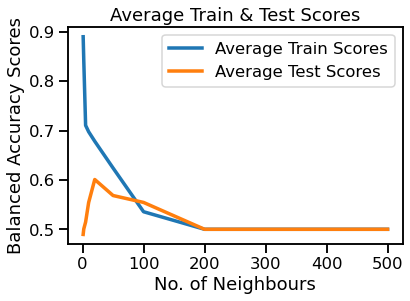

In [22]:
from sklearn.model_selection import validation_curve, KFold
import matplotlib.pyplot as plt

n_neighbours = [1, 2, 5, 10, 20, 50, 100, 200, 500]
train_scores, test_scores = validation_curve(
    model, data, target, 
    param_name="kneighborsclassifier__n_neighbors", 
    param_range=n_neighbours,
    cv=5, scoring="balanced_accuracy", n_jobs=-1,
error_score='raise')

plt.plot(n_neighbours, train_scores.mean(axis=1),
        label='Average Train Scores')
plt.plot(n_neighbours, test_scores.mean(axis=1),
        label='Average Test Scores')
plt.legend()
plt.xlabel("No. of Neighbours")
plt.ylabel('Balanced Accuracy Scores')
_ = plt.title('Average Train & Test Scores')

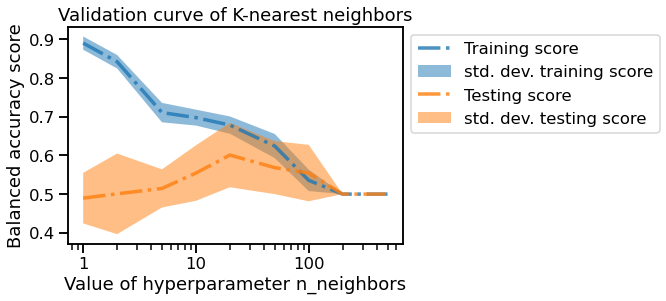

In [24]:
import matplotlib
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
param_name = "kneighborsclassifier__n_neighbors"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=param_range, cv=5,
    n_jobs=2, scoring="balanced_accuracy")

_, ax = plt.subplots()
for name, scores in zip(
    ["Training score", "Testing score"], [train_scores, test_scores]
):
    ax.plot(
        param_range, scores.mean(axis=1), linestyle="-.", label=name,
        alpha=0.8)
    ax.fill_between(
        param_range, scores.mean(axis=1) - scores.std(axis=1),
        scores.mean(axis=1) + scores.std(axis=1),
        alpha=0.5, label=f"std. dev. {name.lower()}")

ax.set_xticks(param_range)
ax.set_xscale("log")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Value of hyperparameter n_neighbors")
ax.set_ylabel("Balanced accuracy score")
ax.set_title("Validation curve of K-nearest neighbors")
_ = ax.legend(bbox_to_anchor=(1., 1.))